In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

# Usage Examples

## Toy Text Corpus
(Source: DWDS, Wort des Tages, "Algorithmus, der", 27.11.2021, URL: https://www.dwds.de/adt )

In [3]:
corpus = "Als Ada Lovelace auf einem Ball den Mathematiker Charles Babbage traf, der sie einlud, die von ihm erfundene „Differenzmaschine“ anzusehen, war sie hellauf begeistert. Die Maschine konnte selbstständig addieren und subtrahieren, doch Ada war klar, dass die Möglichkeiten damit noch lange nicht erschöpft waren. Sie träumte davon, dass eine solche Maschine eines Tages sogar Musik abspielen könnte, und ersann so die Idee eines modernen Computers. 1845 legte sie den ersten Algorithmus zur maschinellen Berechnung der Bernoulli-Zahlen vor und wird daher von vielen als erste Computerprogrammiererin der Welt gefeiert."


## Extract Edges with Dependency Parsers

### with SpaCy

In [4]:
# load the SpaCy model
import de_dep_news_trf
model = de_dep_news_trf.load()

# extract the edges for each sentence
import node_distance as nd
all_edges, num_nodes = nd.extract_edges_from_spacy(corpus, model)

print(num_nodes)
print(all_edges)

[31, 24, 25, 25]
[[(11, 1), (3, 2), (11, 3), (11, 4), (6, 5), (4, 6), (8, 7), (11, 8), (10, 9), (8, 10), (29, 11), (11, 12), (15, 13), (15, 14), (8, 15), (15, 16), (22, 17), (20, 18), (18, 19), (22, 20), (22, 21), (24, 22), (22, 23), (15, 24), (26, 25), (0, 26), (26, 27), (29, 28), (26, 29), (26, 30)], [(2, 1), (3, 2), (0, 3), (5, 4), (3, 5), (5, 6), (6, 7), (3, 8), (3, 9), (11, 10), (9, 11), (11, 12), (11, 13), (22, 14), (16, 15), (22, 16), (21, 17), (20, 18), (20, 19), (21, 20), (22, 21), (11, 22), (3, 23)], [(2, 1), (0, 2), (2, 3), (3, 4), (14, 5), (8, 6), (8, 7), (14, 8), (10, 9), (14, 10), (14, 11), (13, 12), (14, 13), (3, 14), (2, 15), (2, 16), (16, 17), (17, 18), (20, 19), (17, 20), (23, 21), (23, 22), (20, 23), (2, 24)], [(2, 1), (0, 2), (2, 3), (6, 4), (6, 5), (2, 6), (6, 7), (9, 8), (7, 9), (11, 10), (9, 11), (2, 12), (2, 13), (13, 14), (23, 15), (23, 16), (16, 17), (23, 18), (20, 19), (18, 20), (22, 21), (20, 22), (14, 23), (2, 24)]]


### with Stanza

In [5]:
# load the stanza model
import stanza
model = stanza.Pipeline(
    lang='de', processors='tokenize,mwt,pos,lemma,depparse',
    tokenize_pretokenized=False)

# extract the edges for each sentence
import node_distance as nd
all_edges, num_nodes = nd.extract_edges_from_stanza(corpus, model)

print(num_nodes)
print(all_edges)

2021-12-01 17:01:41 INFO: Loading these models for language: de (German):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

2021-12-01 17:01:41 INFO: Use device: cpu
2021-12-01 17:01:41 INFO: Loading: tokenize
2021-12-01 17:01:41 INFO: Loading: mwt
2021-12-01 17:01:41 INFO: Loading: pos
2021-12-01 17:01:41 INFO: Loading: lemma
2021-12-01 17:01:41 INFO: Loading: depparse
2021-12-01 17:01:42 INFO: Done loading processors!


[31, 24, 25, 28]
[[(11, 1), (11, 2), (2, 3), (6, 4), (6, 5), (11, 6), (8, 7), (11, 8), (8, 9), (9, 10), (29, 11), (15, 12), (15, 13), (15, 14), (8, 15), (24, 16), (22, 17), (19, 18), (20, 19), (22, 20), (22, 21), (24, 22), (22, 23), (15, 24), (11, 25), (29, 26), (29, 27), (29, 28), (0, 29), (29, 30)], [(2, 1), (5, 2), (5, 3), (5, 4), (0, 5), (7, 6), (5, 7), (12, 8), (12, 9), (12, 10), (12, 11), (5, 12), (21, 13), (21, 14), (16, 15), (21, 16), (21, 17), (19, 18), (21, 19), (21, 20), (12, 21), (21, 22), (5, 23)], [(2, 1), (0, 2), (2, 3), (13, 4), (13, 5), (8, 6), (8, 7), (13, 8), (10, 9), (8, 10), (13, 11), (13, 12), (3, 13), (13, 14), (17, 15), (17, 16), (2, 17), (17, 18), (20, 19), (17, 20), (23, 21), (23, 22), (20, 23), (2, 24)], [(2, 1), (0, 2), (2, 3), (6, 4), (6, 5), (2, 6), (10, 7), (10, 8), (10, 9), (2, 10), (12, 11), (10, 12), (14, 13), (12, 14), (2, 15), (26, 16), (26, 17), (26, 18), (23, 19), (23, 20), (23, 21), (23, 22), (26, 23), (25, 24), (23, 25), (2, 26), (2, 27)]]


### with trankit

In [6]:
# load the trankit model
import trankit
model = trankit.Pipeline(lang='german', gpu=False, cache_dir='../cache')

# extract the edges for each sentence
import node_distance as nd
all_edges, num_nodes = nd.extract_edges_from_trankit(corpus, model)

print(num_nodes)
print(all_edges)

Loading pretrained XLM-Roberta, this may take a while...
Loading tokenizer for german
Loading tagger for german
Loading multi-word expander for german
Loading lemmatizer for german
Loading NER tagger for german
Active language: german
[31, 24, 25, 27]
[[(11, 1), (11, 2), (2, 3), (6, 4), (6, 5), (11, 6), (8, 7), (11, 8), (8, 9), (9, 10), (29, 11), (15, 12), (15, 13), (15, 14), (8, 15), (24, 16), (22, 17), (19, 18), (20, 19), (22, 20), (22, 21), (24, 22), (22, 23), (15, 24), (11, 25), (29, 26), (29, 27), (29, 28), (0, 29), (29, 30)], [(2, 1), (5, 2), (5, 3), (5, 4), (0, 5), (7, 6), (5, 7), (12, 8), (12, 9), (12, 10), (12, 11), (5, 12), (21, 13), (21, 14), (16, 15), (21, 16), (16, 17), (19, 18), (21, 19), (21, 20), (12, 21), (21, 22), (5, 23)], [(2, 1), (0, 2), (2, 3), (13, 4), (13, 5), (8, 6), (8, 7), (13, 8), (10, 9), (13, 10), (13, 11), (13, 12), (3, 13), (13, 14), (17, 15), (17, 16), (2, 17), (17, 18), (20, 19), (17, 20), (23, 21), (23, 22), (20, 23), (2, 24)], [(2, 1), (0, 2), (2, 3)

## Compute Shortest Paths between Nodes

In [7]:
# compute node distances and the corresponding token distances
import node_distance as nd
%time nodedist, tokendist, indicies = nd.node_token_distances(all_edges, num_nodes, cutoff=25)

CPU times: user 11.8 ms, sys: 2.69 ms, total: 14.5 ms
Wall time: 17.5 ms


Display the adjacency matrix

In [8]:
import numpy as np
import scipy.sparse

getdim = lambda x: int(0.5 * (np.sqrt(8 * x + 1) + 1))

for i in range(len(nodedist)):
    n = getdim(len(nodedist[0]))
    mat = scipy.sparse.coo_matrix((nodedist[0], np.array(indicies[0]).T), shape=(n,n))

mat.todense()[:10, :10]

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [3, 2, 0, 0, 0, 0, 0, 0, 0, 0],
        [4, 3, 1, 0, 0, 0, 0, 0, 0, 0],
        [4, 3, 3, 4, 0, 0, 0, 0, 0, 0],
        [4, 3, 3, 4, 2, 0, 0, 0, 0, 0],
        [3, 2, 2, 3, 1, 1, 0, 0, 0, 0],
        [4, 3, 3, 4, 4, 4, 3, 0, 0, 0],
        [3, 2, 2, 3, 3, 3, 2, 1, 0, 0],
        [4, 3, 3, 4, 4, 4, 3, 2, 1, 0]])

## Histograms as Features

### The Distribution of node distances

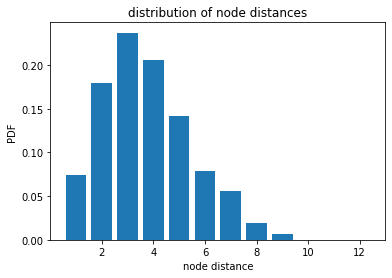

In [9]:
import node_distance as nd
xobs, pdf, _ = nd.nodedist_distribution(nodedist, xmin=1, xmax=12)

import matplotlib.pyplot as plt
plt.bar(xobs, pdf);
plt.title("distribution of node distances");
plt.xlabel("node distance");
plt.ylabel("PDF");
plt.show();

### Distribution of token distance vs node distance

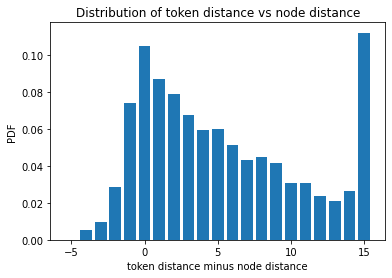

In [10]:
import node_distance as nd
xobs, pdf, _ = nd.tokenvsnode_distribution(tokendist, nodedist, xmin=-5, xmax=15)

import matplotlib.pyplot as plt
plt.bar(xobs, pdf);
plt.title("Distribution of token distance vs node distance");
plt.xlabel("token distance minus node distance");
plt.ylabel("PDF");
plt.show();

## Feature Engineering

### Download Toy Data

In [ ]:
%%capture
%env FILENAME=deu_news_2020_10K
!wget -q "https://pcai056.informatik.uni-leipzig.de/downloads/corpora/${FILENAME}.tar.gz"
!tar -xf "${FILENAME}.tar.gz"
!mv "${FILENAME}/${FILENAME}-sentences.txt" "demo-data.txt"
!rm -rf "${FILENAME}"
!rm -rf "${FILENAME}.tar.gz"

### Create Features for each Sentence Example 

In [28]:
%%time
# load the SpaCy model
import de_dep_news_trf
model = de_dep_news_trf.load()

# start the loop
import node_distance as nd
area, pdf = [], []

abortcounter = 0
with open("demo-data.txt", "r") as fp:
    for line in fp:
        try:
            # read sentence string
            senttext = line.split("\t")[1]
            
            # (1) dependency parsing, extract graph edges
            edges, num_nodes = nd.extract_edges_from_spacy(senttext, model)
            
            # (2) compute all node distances
            nodedist, tokendist, _ = nd.node_token_distances(edges, num_nodes)
            
            # (3) Distribution of token distance vs node distance
            _, pdftmp, _ = nd.tokenvsnode_distribution(
                tokendist, nodedist, xmin=-5, xmax=15)
            pdf.append(pdftmp)
            
        except Exception as e:
            print(e)
        
        abortcounter += 1
        if abortcounter > 2000:
            break

CPU times: user 5min 16s, sys: 11.3 s, total: 5min 28s
Wall time: 6min 8s


### t-SNE and Clustering

In [32]:
from sklearn.cluster import MiniBatchKMeans
cls = MiniBatchKMeans(4)
%time clusters = cls.fit(pdf)

CPU times: user 83.4 ms, sys: 12.8 ms, total: 96.3 ms
Wall time: 35.9 ms


In [30]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=50, init='pca')
%time X_emb = model.fit_transform(np.array(pdf))

/Users/uh/projects/expose1/node-distance/.venv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


CPU times: user 56.8 s, sys: 2.18 s, total: 59 s
Wall time: 22.8 s


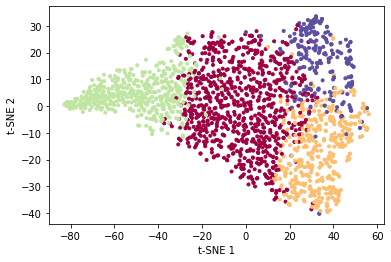

In [33]:
plt.scatter(X_emb[:, 0], X_emb[:, 1], c=clusters.labels_, 
            marker='.', cmap=plt.cm.Spectral);
plt.xlabel('t-SNE 1'); plt.ylabel('t-SNE 2');